In [9]:
## Installing Library

!pip install autoviz

In [10]:
## Importing libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [11]:
## Loading Data

# Data URL from UCI repository
auto_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

# List of columns
column_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
                'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 
                'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 
                'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

# Reading data as pandas dataframe
df = pd.read_csv(auto_data_url, names=column_names)
df = df.replace({'?': np.nan})

In [12]:
df.head(5)

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3               NaN  alfa-romero       gas        std          two   
1          3               NaN  alfa-romero       gas        std          two   
2          1               NaN  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19    3.40              10.0        102      5500       24   
4         mpfi  3.19    3.40               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

In [13]:
## Converting columns to Numeric type
numeric_cols = ['normalized-losses', 'engine-size', 'horsepower', 'peak-rpm', 'bore', 'stroke', 'price']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce', axis=1)


In [14]:
## Instantiating the  Autoviz library
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

Shape of your Data Set loaded: (205, 26)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    25 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Regression problem #####################


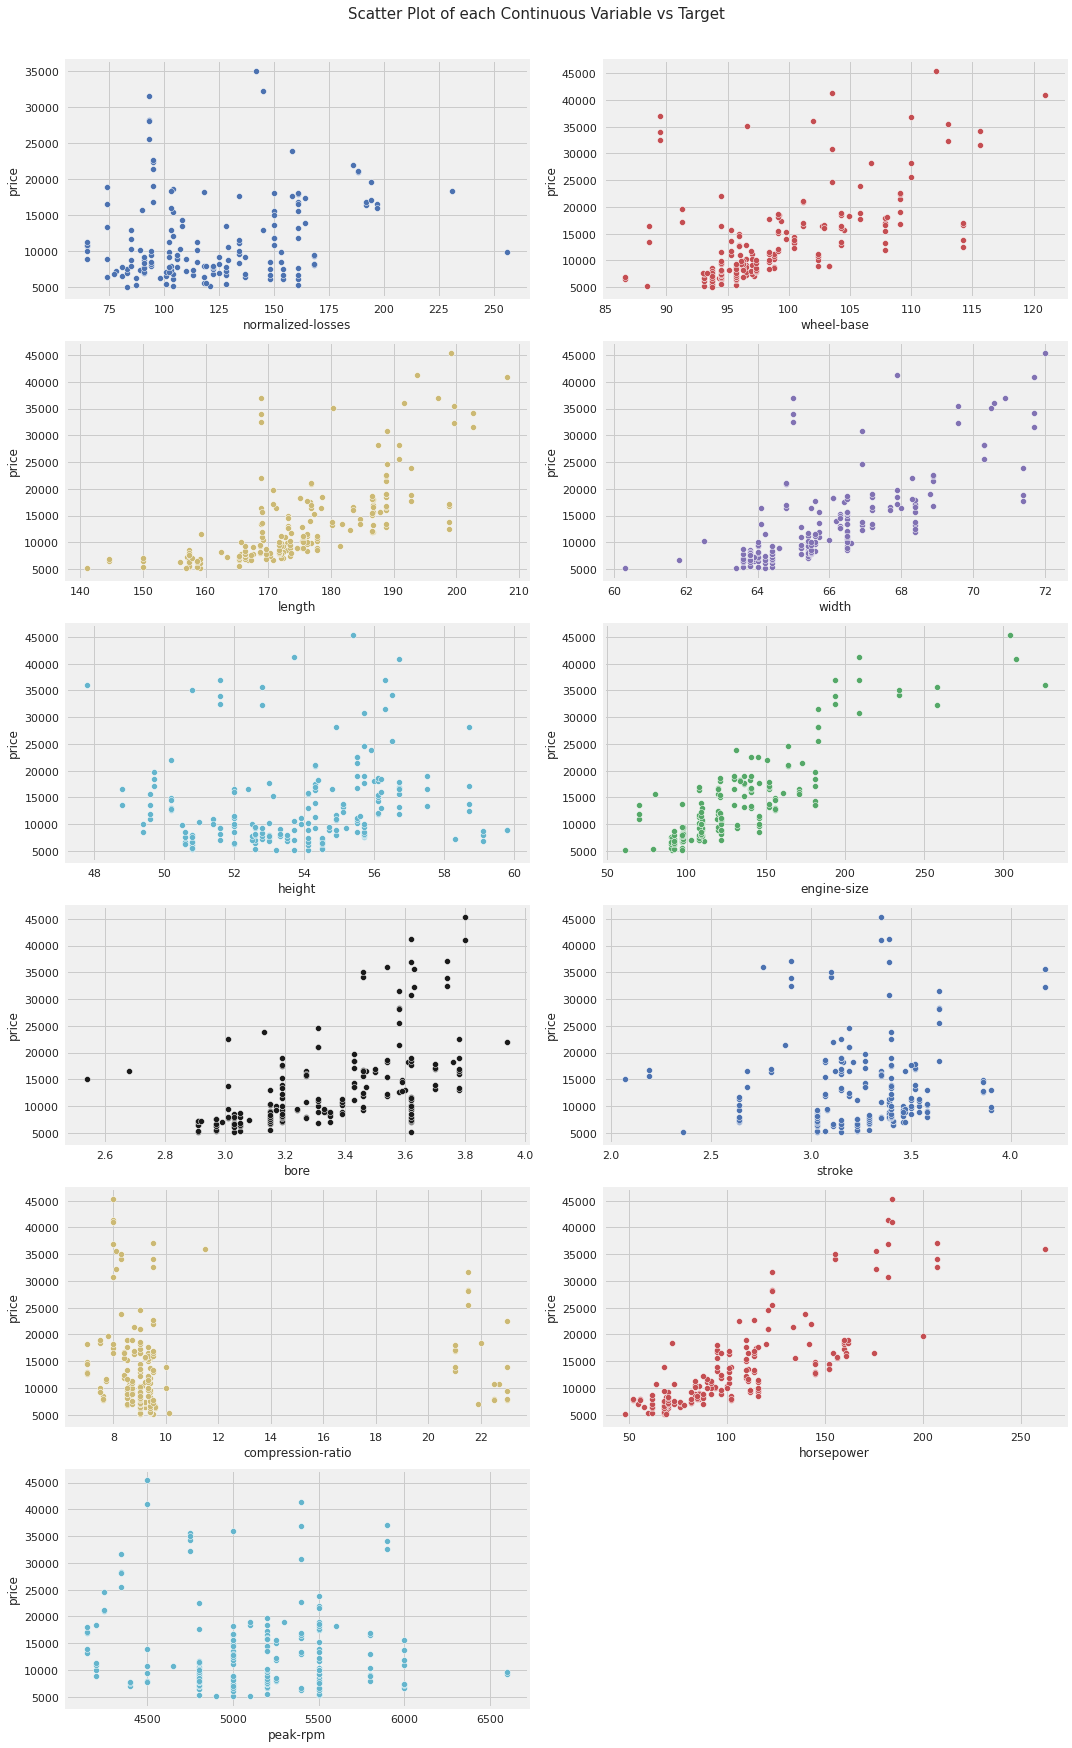

Number of All Scatter Plots = 66


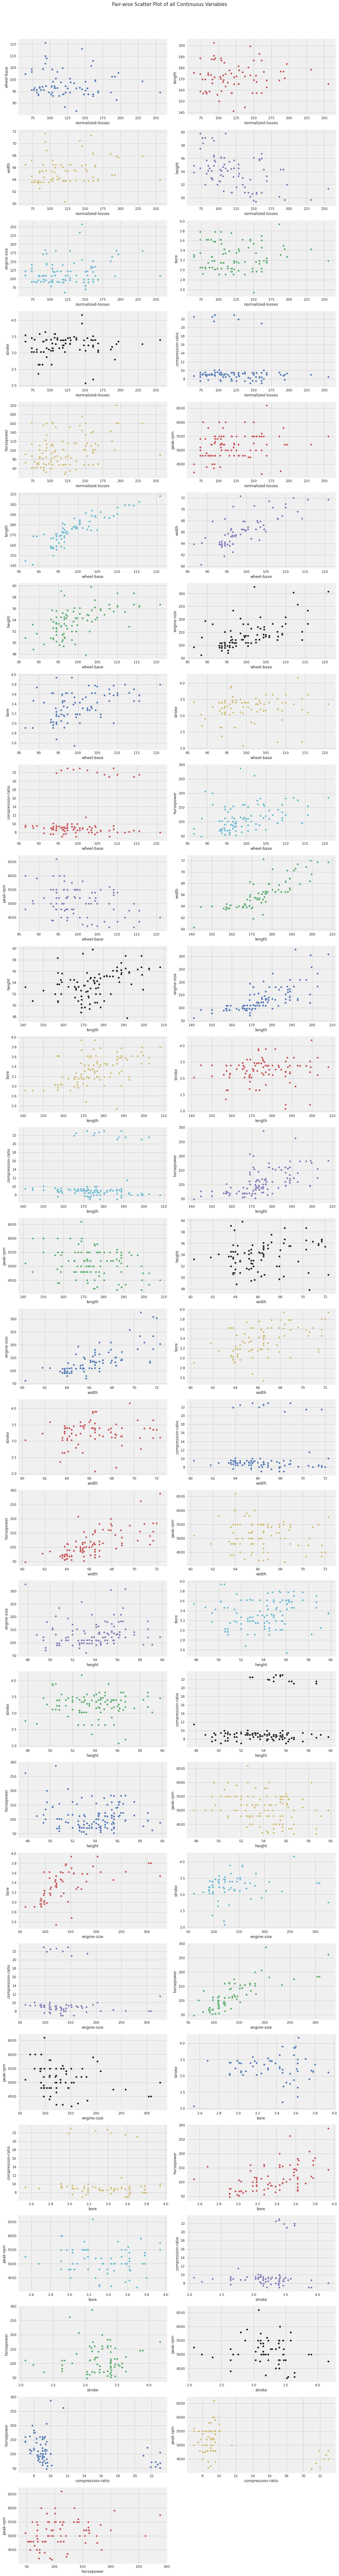

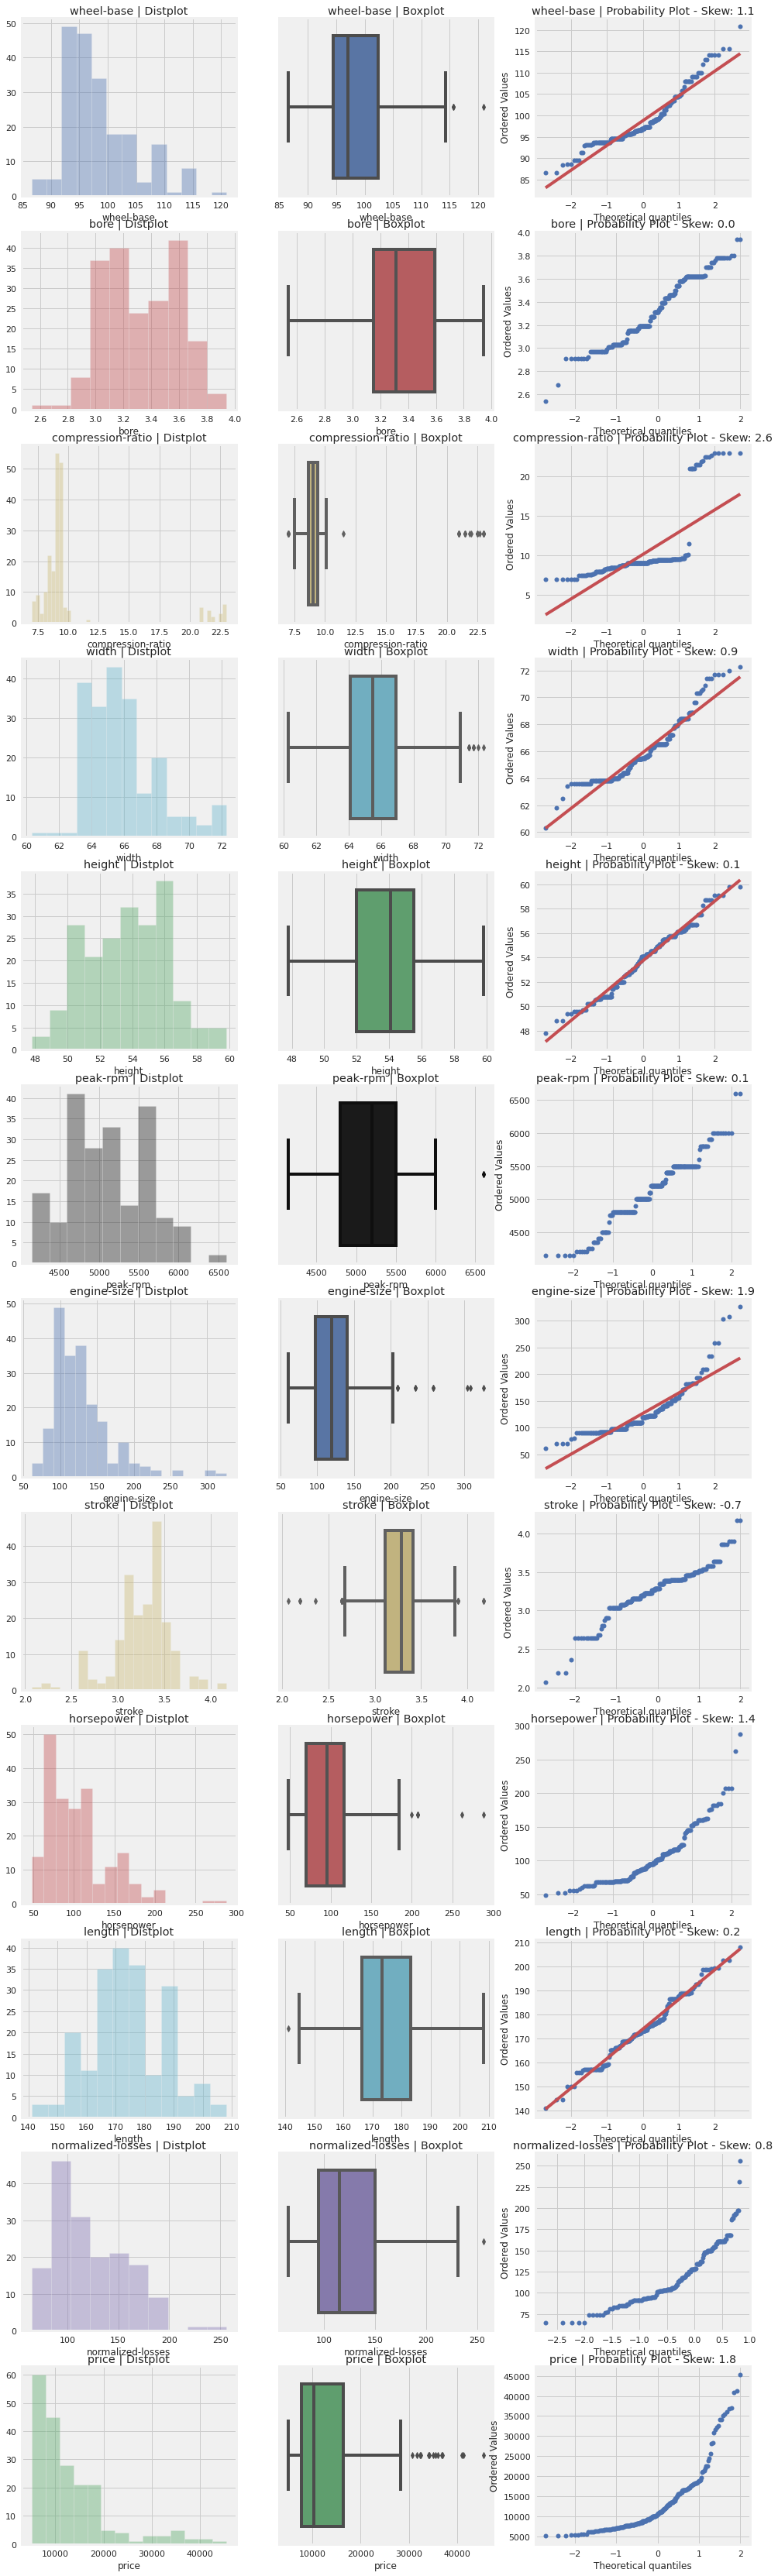

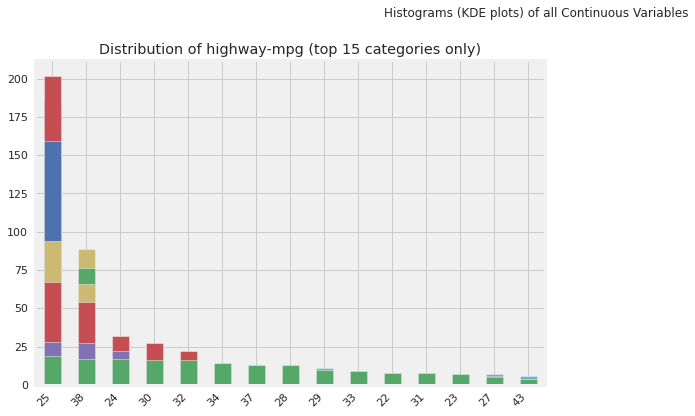

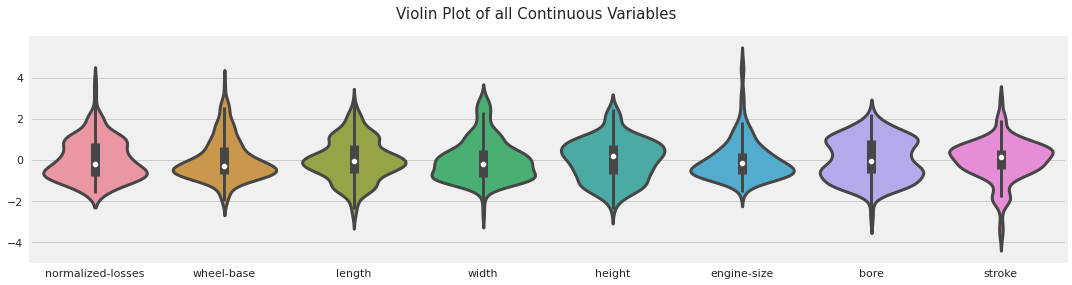

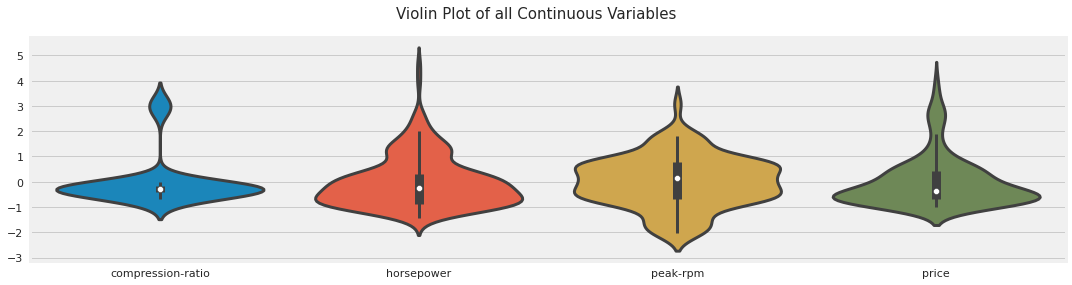

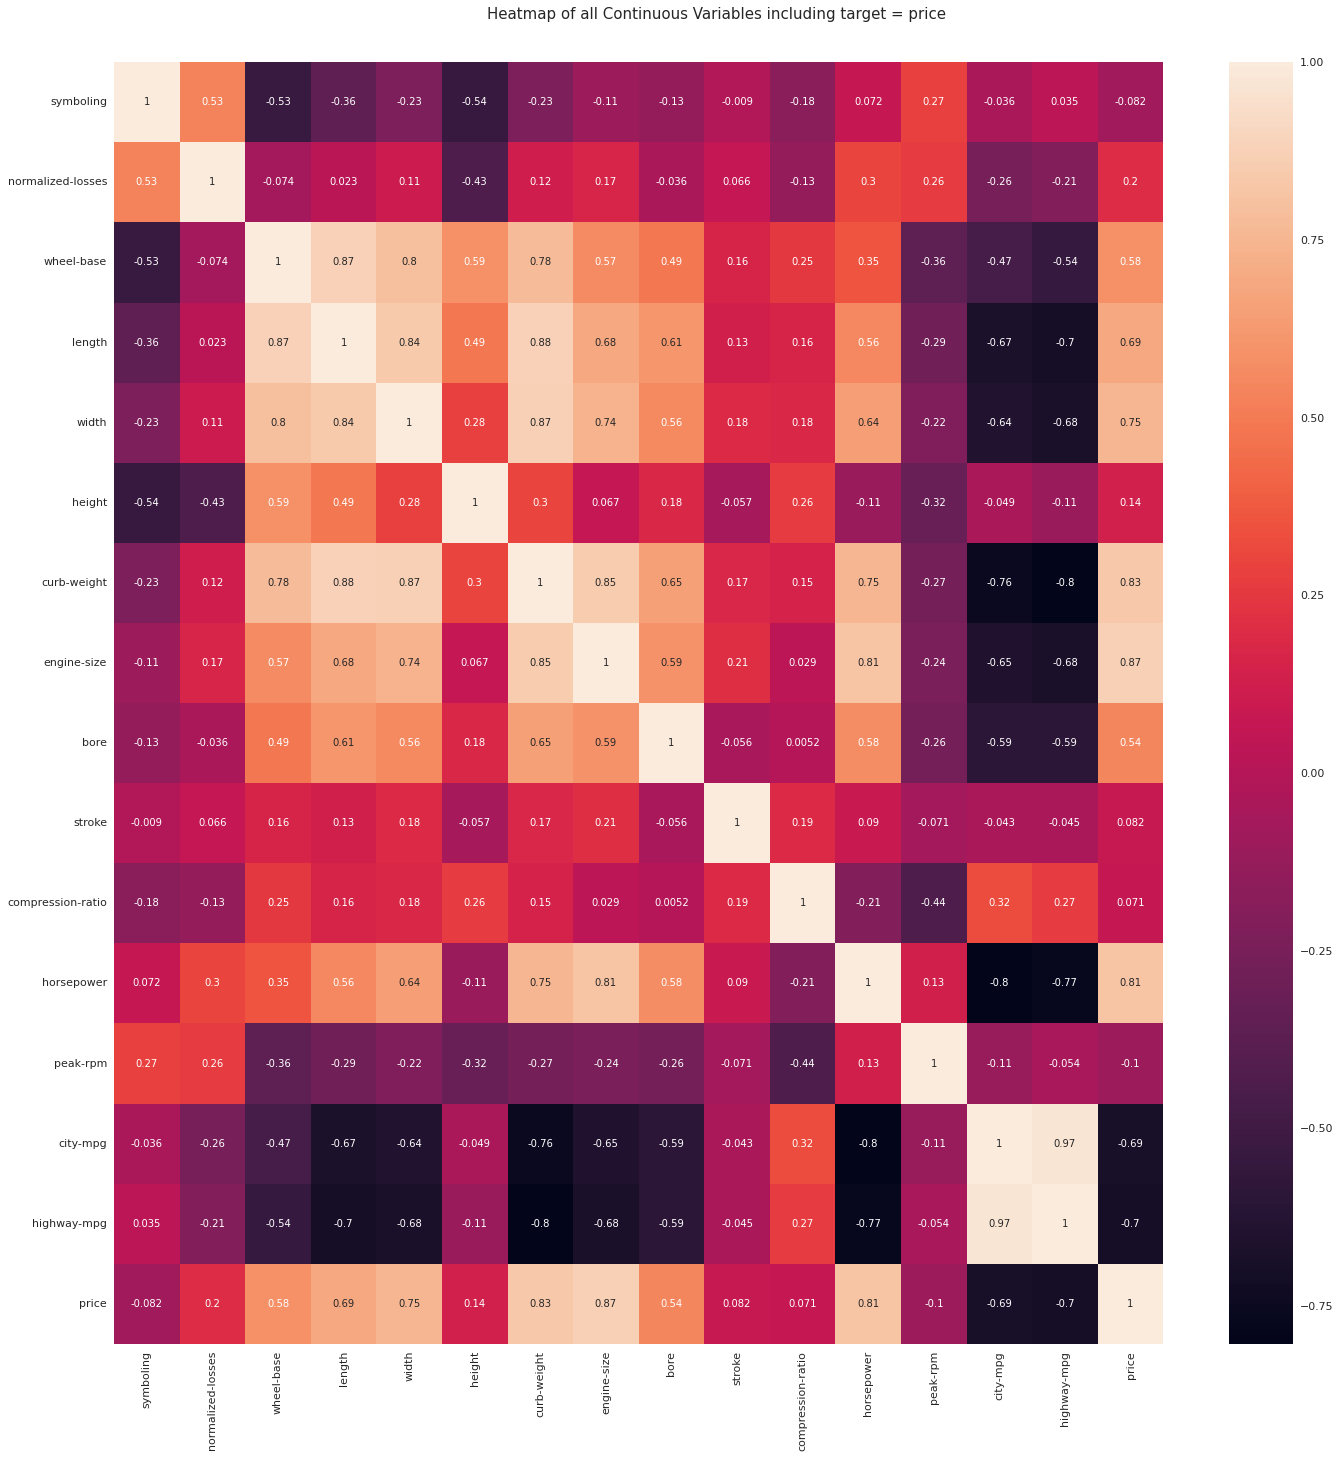

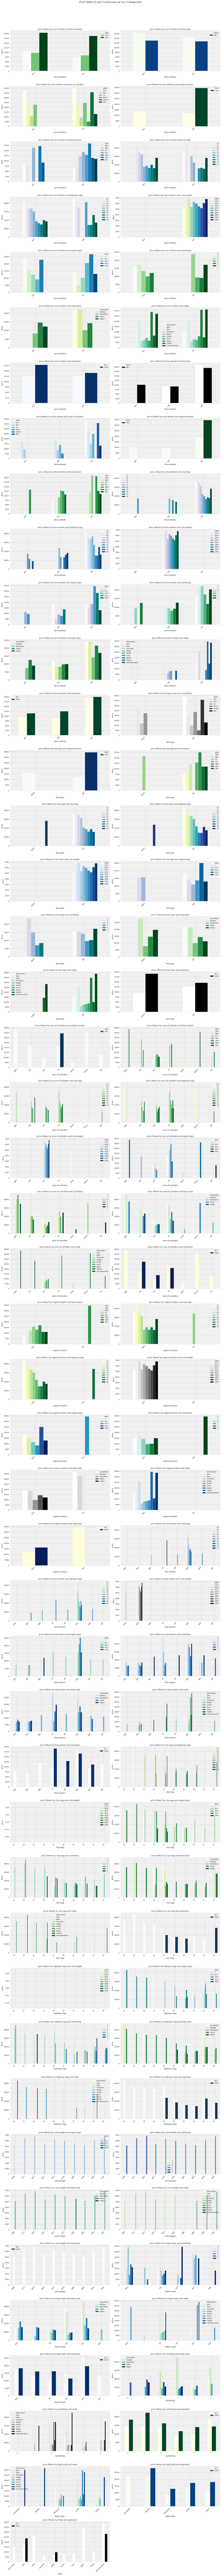

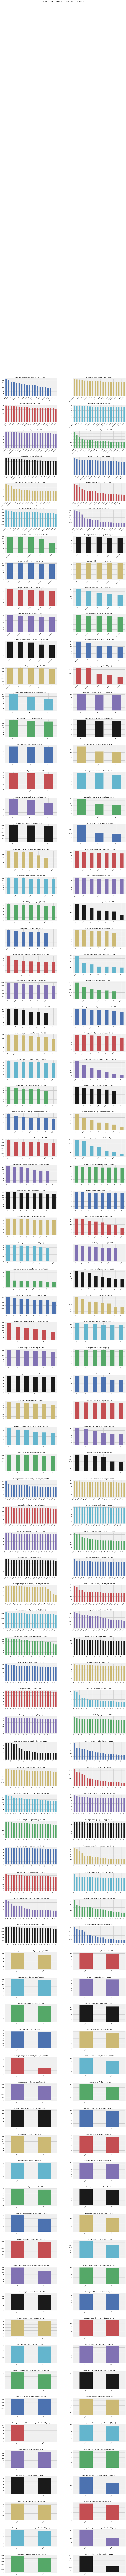

All Plots done
Time to run AutoViz = 92 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [15]:
## Calling AutoViz using the dataframe
dft = AV.AutoViz(filename="",
                 sep="",
                 depVar="price",
                 dfte=df,
                 header=1,
                 verbose=0,
                 lowess=False,
                 chart_format="svg",
                 max_rows_analyzed=150000,
                 max_cols_analyzed=30,
                 save_plot_dir=None
                )

**Notes:**

*   AutoViz will visualize any sized file using a statistically valid sample.
*   COMMA is assumed as default separator in file. But you can change it.
*   Assumes first row as header in file but you can change it.

*   **verbose option**
 
   *   if 0, display minimal information but displays charts on your notebook
   *   if 1, print extra information on the notebook and also display charts
   *   if 2, will not display any charts, it will simply save them in your local machine under AutoViz_Plots directory under your current working folder.

*  **chart_format option**

   *   if 'svg','jpg' or 'png', displays all charts or saves them depending on verbose option.
   *   if 'bokeh', plots interactive charts using Bokeh on your Jupyter Notebook
   *   if 'server', will display charts on your browser with one chart type in each tab
   *   if 'html', will create bokeh interactive charts and silently save them under AutoViz_Plots directory or any directory you specify in the save_plot_dir setting.

**Arguments**

* **filename** - Make sure that you give filename as empty string ("") if there is no 
filename associated with this data and you want to use a dataframe, then use dfte to give the name of the dataframe. Otherwise, fill in the file name and leave dfte as empty string. Only one of these two is needed to load the data set.
* **sep** - this is the separator in the file. It can be comma, semi-colon or tab or any value that you see in your file that separates each column.
* **depVar** - target variable in your dataset. You can leave it as empty string if you don't have a target variable in your data.
* **dfte** - this is the input dataframe in case you want to load a pandas dataframe to plot charts. In that case, leave filename as an empty string.
header - the row number of the header row in your file. If it is the first row, then this must be zero.
* **verbose** - it has 3 acceptable values: 0, 1 or 2. With zero, you get all charts but limited info. With 1 you get all charts and more info. With 2, you will not see any charts but they will be quietly generated and save in your local current directory under the AutoViz_Plots directory which will be created. Make sure you delete this folder periodically, otherwise, you will have lots of charts saved here if you used verbose=2 option a lot.
* **lowess** - this option is very nice for small datasets where you can see regression lines for each pair of continuous variable against the target variable. Don't use this for large data sets (that is over 100,000 rows)
* **chart_format** - this can be 'svg', 'png', 'jpg' or 'bokeh' or 'server' or 'html'. You will get charts generated (inline with verbose=0 or 1 option). Instead you can silently save them in multiple formats if you used verbose=2 option. The latter options are useful for interactive charts.
* **max_rows_analyzed** - limits the max number of rows that is used to display charts. If you have a very large data set with millions of rows, then use this option to limit the amount of time it takes to generate charts. We will take a statistically valid sample.
* **max_cols_analyzed** - limits the number of continuous vars that can be analyzed
* **save_plot_dir** - directory you want the plots to be saved. Default is None which means it is saved under the current directory under a sub-folder named AutoViz_Plots. If the save_plot_dir does not exist, it creates it.